In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

In [3]:
def NN(m1, m2, w1, w2, b):
    z = m1 * w1 + m2 * w2 + b
    return sigmoid(z)
        
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [4]:
l_length = [3, 4, 3.5, 5.5, 2, 3, 2, 1]
l_width = [1.5, 1.5, .5, 1, 1, 1, .5, 1]
color = [0, 0, 0, 0, 1, 1, 1, 1]
data = []

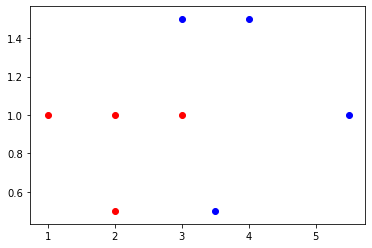

In [5]:
i = 0
for l in l_length:
    w = l_width[i]
    c = color[i]
    data.append([l, w, c])
    if c:
        plt.scatter(l, w, color='red')
    else:
        plt.scatter(l, w, color='blue') 
    i += 1

data_f = pd.DataFrame(data, columns=['Length', 'Width', 'Color'])

In [6]:
prediction = []
for characteristics in data:
    l = characteristics[0]
    w = characteristics[1]
    prediction.append(NN(l, w, w1, w2, b))

In [7]:
data_f['Prediction'] = prediction

In [8]:
cost = []
for label, row in data_f.iterrows():
    prediction = row['Prediction']
    color = row['Color']
    cost.append(int(((prediction - color)**2)*100))

In [9]:
cost

[6, 10, 44, 44, 45, 33, 23, 57]

In [10]:
data_f['Cost %'] = cost

In [11]:
data_f

,Length,Width,Color,Prediction,Cost %
0,3.0,1.5,0,0.246018,6
1,4.0,1.5,0,0.329214,10
2,3.5,0.5,0,0.665930,44
3,5.5,1.0,0,0.668950,44
4,2.0,1.0,1,0.326217,45
5,3.0,1.0,1,0.421377,33
6,2.0,0.5,1,0.519365,23
7,1.0,1.0,1,0.243503,57


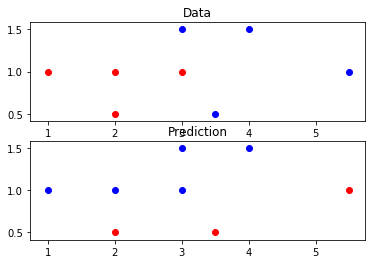

In [30]:
fig, ax = plt.subplots(2, 1)
ax[0].set_title('Data')
ax[1].set_title('Prediction')

for label, row in data_f.iterrows():
    l = row['Length']
    w = row['Width']
    p = row['Prediction']
    c = row['Color']
    cost = row['Cost %']
    
    if c > 0.5:
        ax[0].scatter(l, w, color="red")
    else:
        ax[0].scatter(l, w, color="blue")     
        
    if p > 0.5:
        ax[1].scatter(l, w, color="red")
    else:
        ax[1].scatter(l, w, color="blue")

In [24]:
cost

[6, 10, 44, 44, 45, 33, 23, 57]

In [31]:
data

[[3, 1.5, 0],
 [4, 1.5, 0],
 [3.5, 0.5, 0],
 [5.5, 1, 0],
 [2, 1, 1],
 [3, 1, 1],
 [2, 0.5, 1],
 [1, 1, 1]]